### Name: Taraneh Khosrojerdi
### StudentId: 400104929

# Librarires

In [1]:
import numpy as np
import random

from sklearn.datasets import fetch_california_housing

# Load Dataset

In [2]:
data = fetch_california_housing()
X = data.data
sample_numbers = 4000
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]

# Implement KMeans algorithm (do not use any libraries and implement it from scratch)

In [3]:
#TODO
class KMeans:
    def __init__(self, n_clusters=5, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        # Randomly initialize centroids
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            # Assign clusters
            self.labels = self._assign_clusters(X)
            # Calculate new centroids
            new_centroids = self._calculate_centroids(X)
            # Check for convergence
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _calculate_centroids(self, X):
        return np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])

    def predict(self, X):
        return self._assign_clusters(X)


# Use elbow method and silhouette method to choose optimal cluster numbers

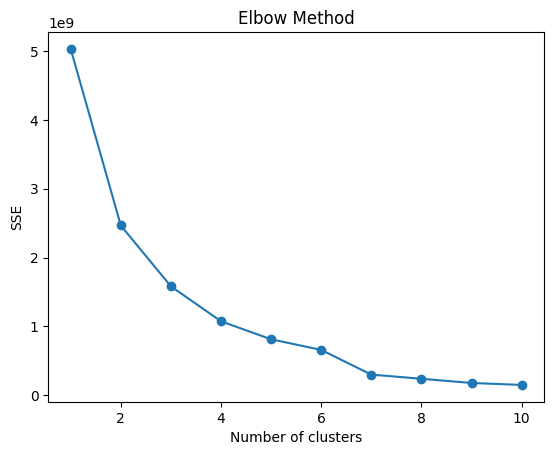

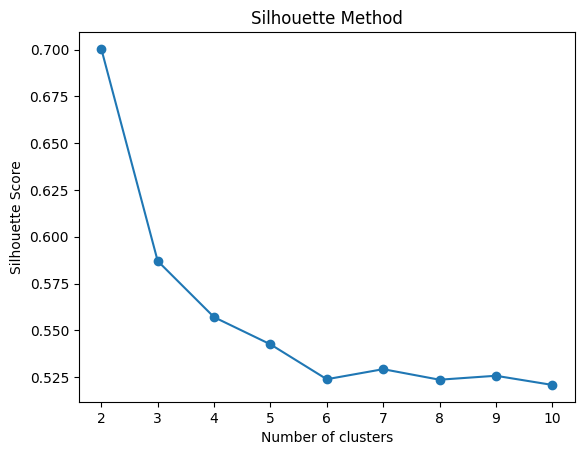

In [9]:
# TODO
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
def elbow_method(X, max_k=10):
    sse = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        sse.append(np.sum((X - kmeans.centroids[kmeans.predict(X)]) ** 2))
    plt.plot(range(1, max_k + 1), sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method')
    plt.show()

def silhouette_method(X, max_k=10):
    silhouette_avg = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        labels = kmeans.predict(X)
        silhouette_avg.append(silhouette_score(X, labels))
    plt.plot(range(2, max_k + 1), silhouette_avg, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method')
    plt.show()

elbow_method(x_data)
silhouette_method(x_data)

# Compare your k means algorithm with sklearn k means algorithm (compare it with both elbow and silhouette method)

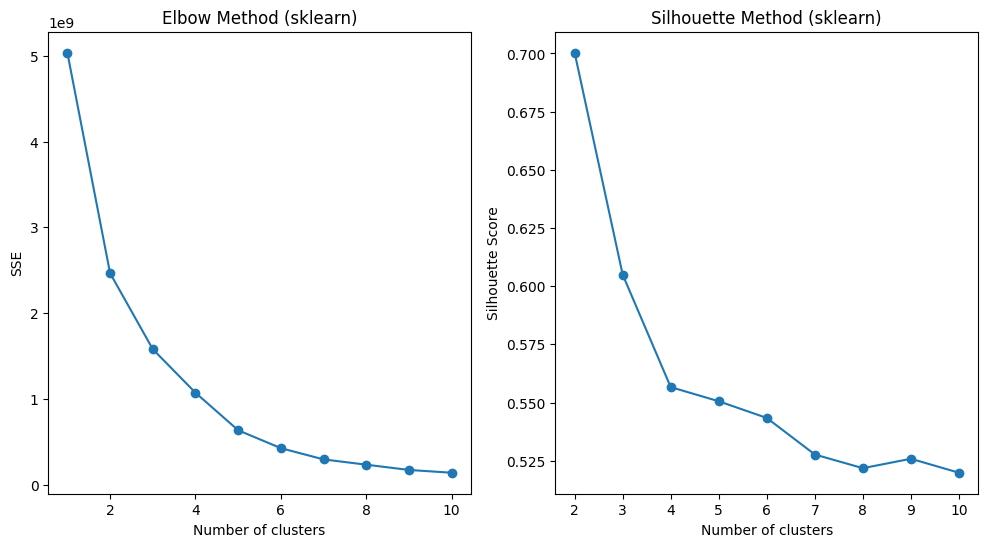

In [10]:
#TODO
from sklearn.cluster import KMeans as SklearnKMeans

def compare_with_sklearn(X, max_k=10):
    sse = []
    silhouette_avg = []
    for k in range(1, max_k + 1):
        sklearn_kmeans = SklearnKMeans(n_clusters=k)
        sklearn_kmeans.fit(X)
        sse.append(sklearn_kmeans.inertia_)
        if k > 1:
            silhouette_avg.append(silhouette_score(X, sklearn_kmeans.labels_))
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, max_k + 1), sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method (sklearn)')
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_k + 1), silhouette_avg, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method (sklearn)')
    plt.show()

compare_with_sklearn(x_data)

### what is the optimal cluster number based on your custom kmeans algorithm and sklearn kmeans algorithm? if answer is different based on each algorithm then explain difference

### would you prefer elbow method for determining optimal cluster number or silhouette method?
#### I prefer silhouette method because in elbow method sometimes it's hard to say where is the elbow point but silhouette method is more deterministic rather than elbow method

In [11]:
# The optimal number of clusters is 2 using each of the methods. Although, determining the optimal number is usually 
# more difficult while using ELBO method, in comparison to silouette score.

# As mentiond above, finding the ELBO point may come with some challenges; while utilizing silouhette score offers a 
# deterministic approach which makes the interpretation of outputs much easier. As a result, I would prefer using 
# score as well. However, for certain cases, e.g. when we do not have access to predefined libraries, I would
# rather ELBO method due to its easy implementation. Overall, it would be a good choice to use both of these methods
# because each of them provide a different point of view on our subject.